In [22]:
from sympy import *
import numpy as np
import scipy
import scipy.optimize as opt
from matplotlib import pyplot as plt
import math

import warnings
warnings.filterwarnings('ignore')

import matplotlib as mpl
mpl.rc('font',family='Times New Roman')

Critical c [cm] 9.681416881389529


Text(0.5, 1.0, '2e')

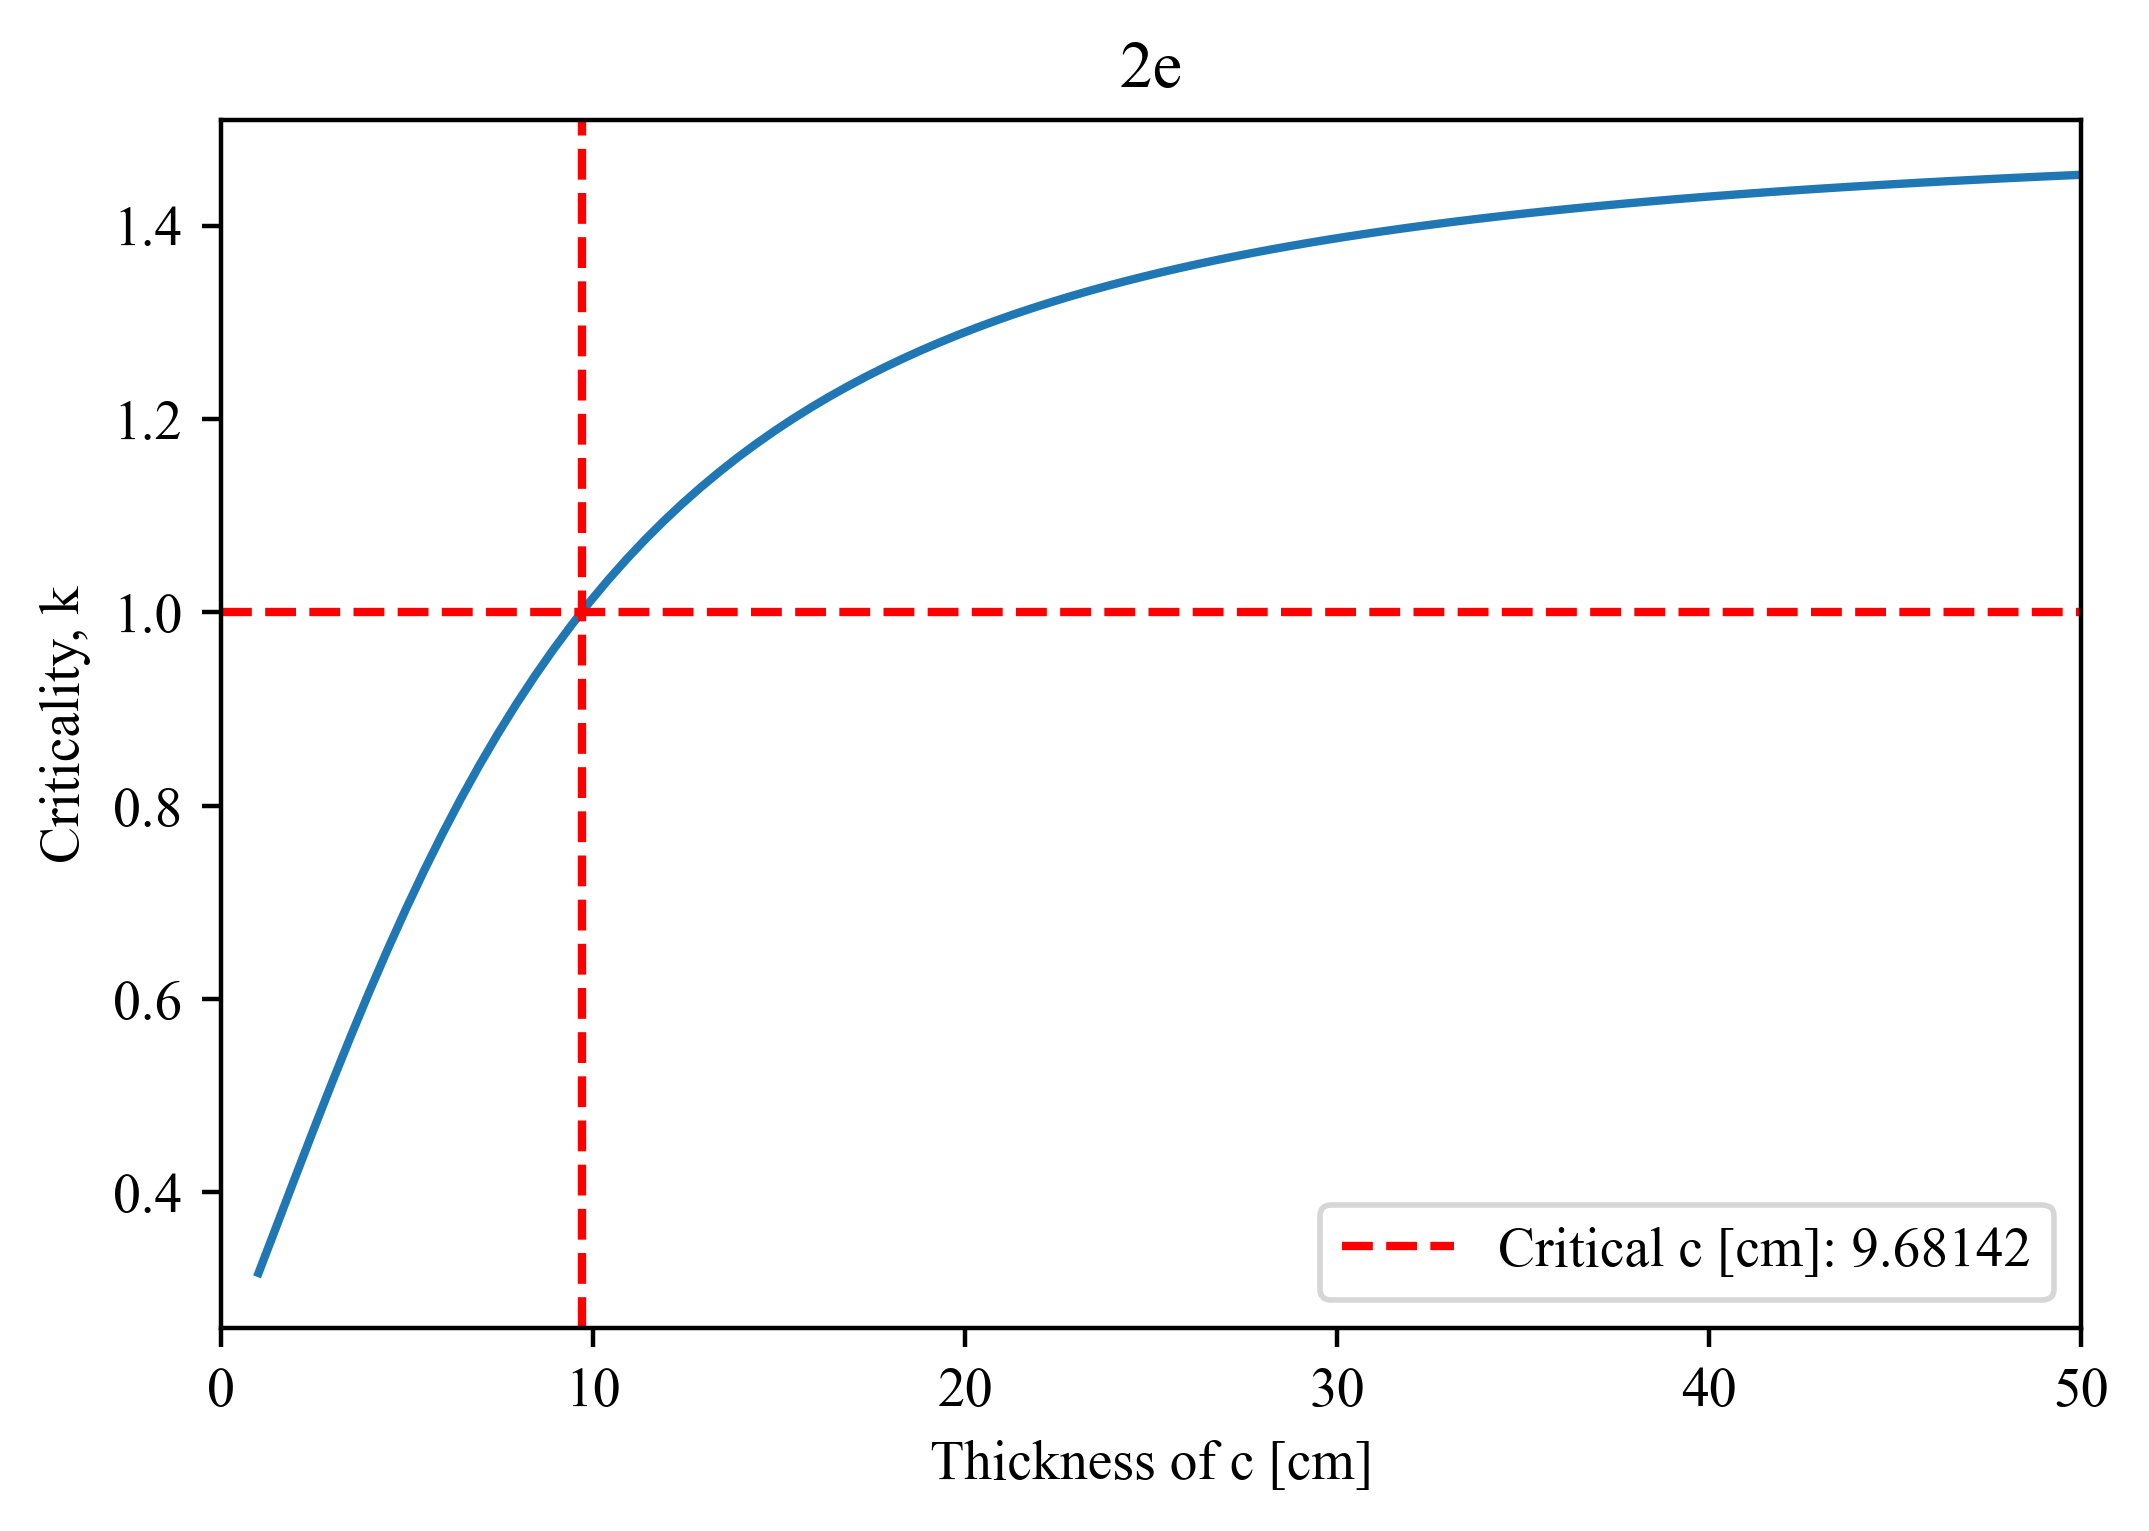

In [34]:
#2e
nu, SigmaF, SigmaA, D, a, b = 2.4, 0.066, 0.08, 1, 20, 30
aT, bT = a/2 + 2*D, b/2 + 2*D
aT *=2
bT *=2

def k_finder(x):
    return (nu*SigmaF/x-SigmaA)/D - (np.pi/aT)**2 - (np.pi/bT)**2 - (np.pi/(c+4*D))**2
def c_finder(x):
    return (nu*SigmaF-SigmaA)/D - (np.pi/aT)**2 - (np.pi/bT)**2 - (np.pi/(x+4*D))**2

c_arr = np.linspace(1, 50, 100)
k_arr = np.zeros(len(c_arr))

for i in range(len(c_arr)):
    c = c_arr[i]
    k_arr[i] = opt.root(k_finder, 1).x

#Output
print('Critical c [cm] {}'.format(opt.root(c_finder, 10).x[0]))    

plt.figure(dpi=400)
plt.plot(c_arr, k_arr)
plt.axhline(y = 1, color = 'r', linestyle = '--')
plt.axvline(x = opt.root(c_finder, 10).x, color = 'r', linestyle = '--', label='Critical c [cm]: {}'.format(round(opt.root(c_finder, 10).x[0], 5)))
plt.xlabel('Thickness of c [cm]')
plt.ylabel('Criticality, k')
plt.legend()
plt.xlim(0,50)
plt.title('2e')

k half cylin: 1.0623479058311327


<function matplotlib.pyplot.show(close=None, block=None)>

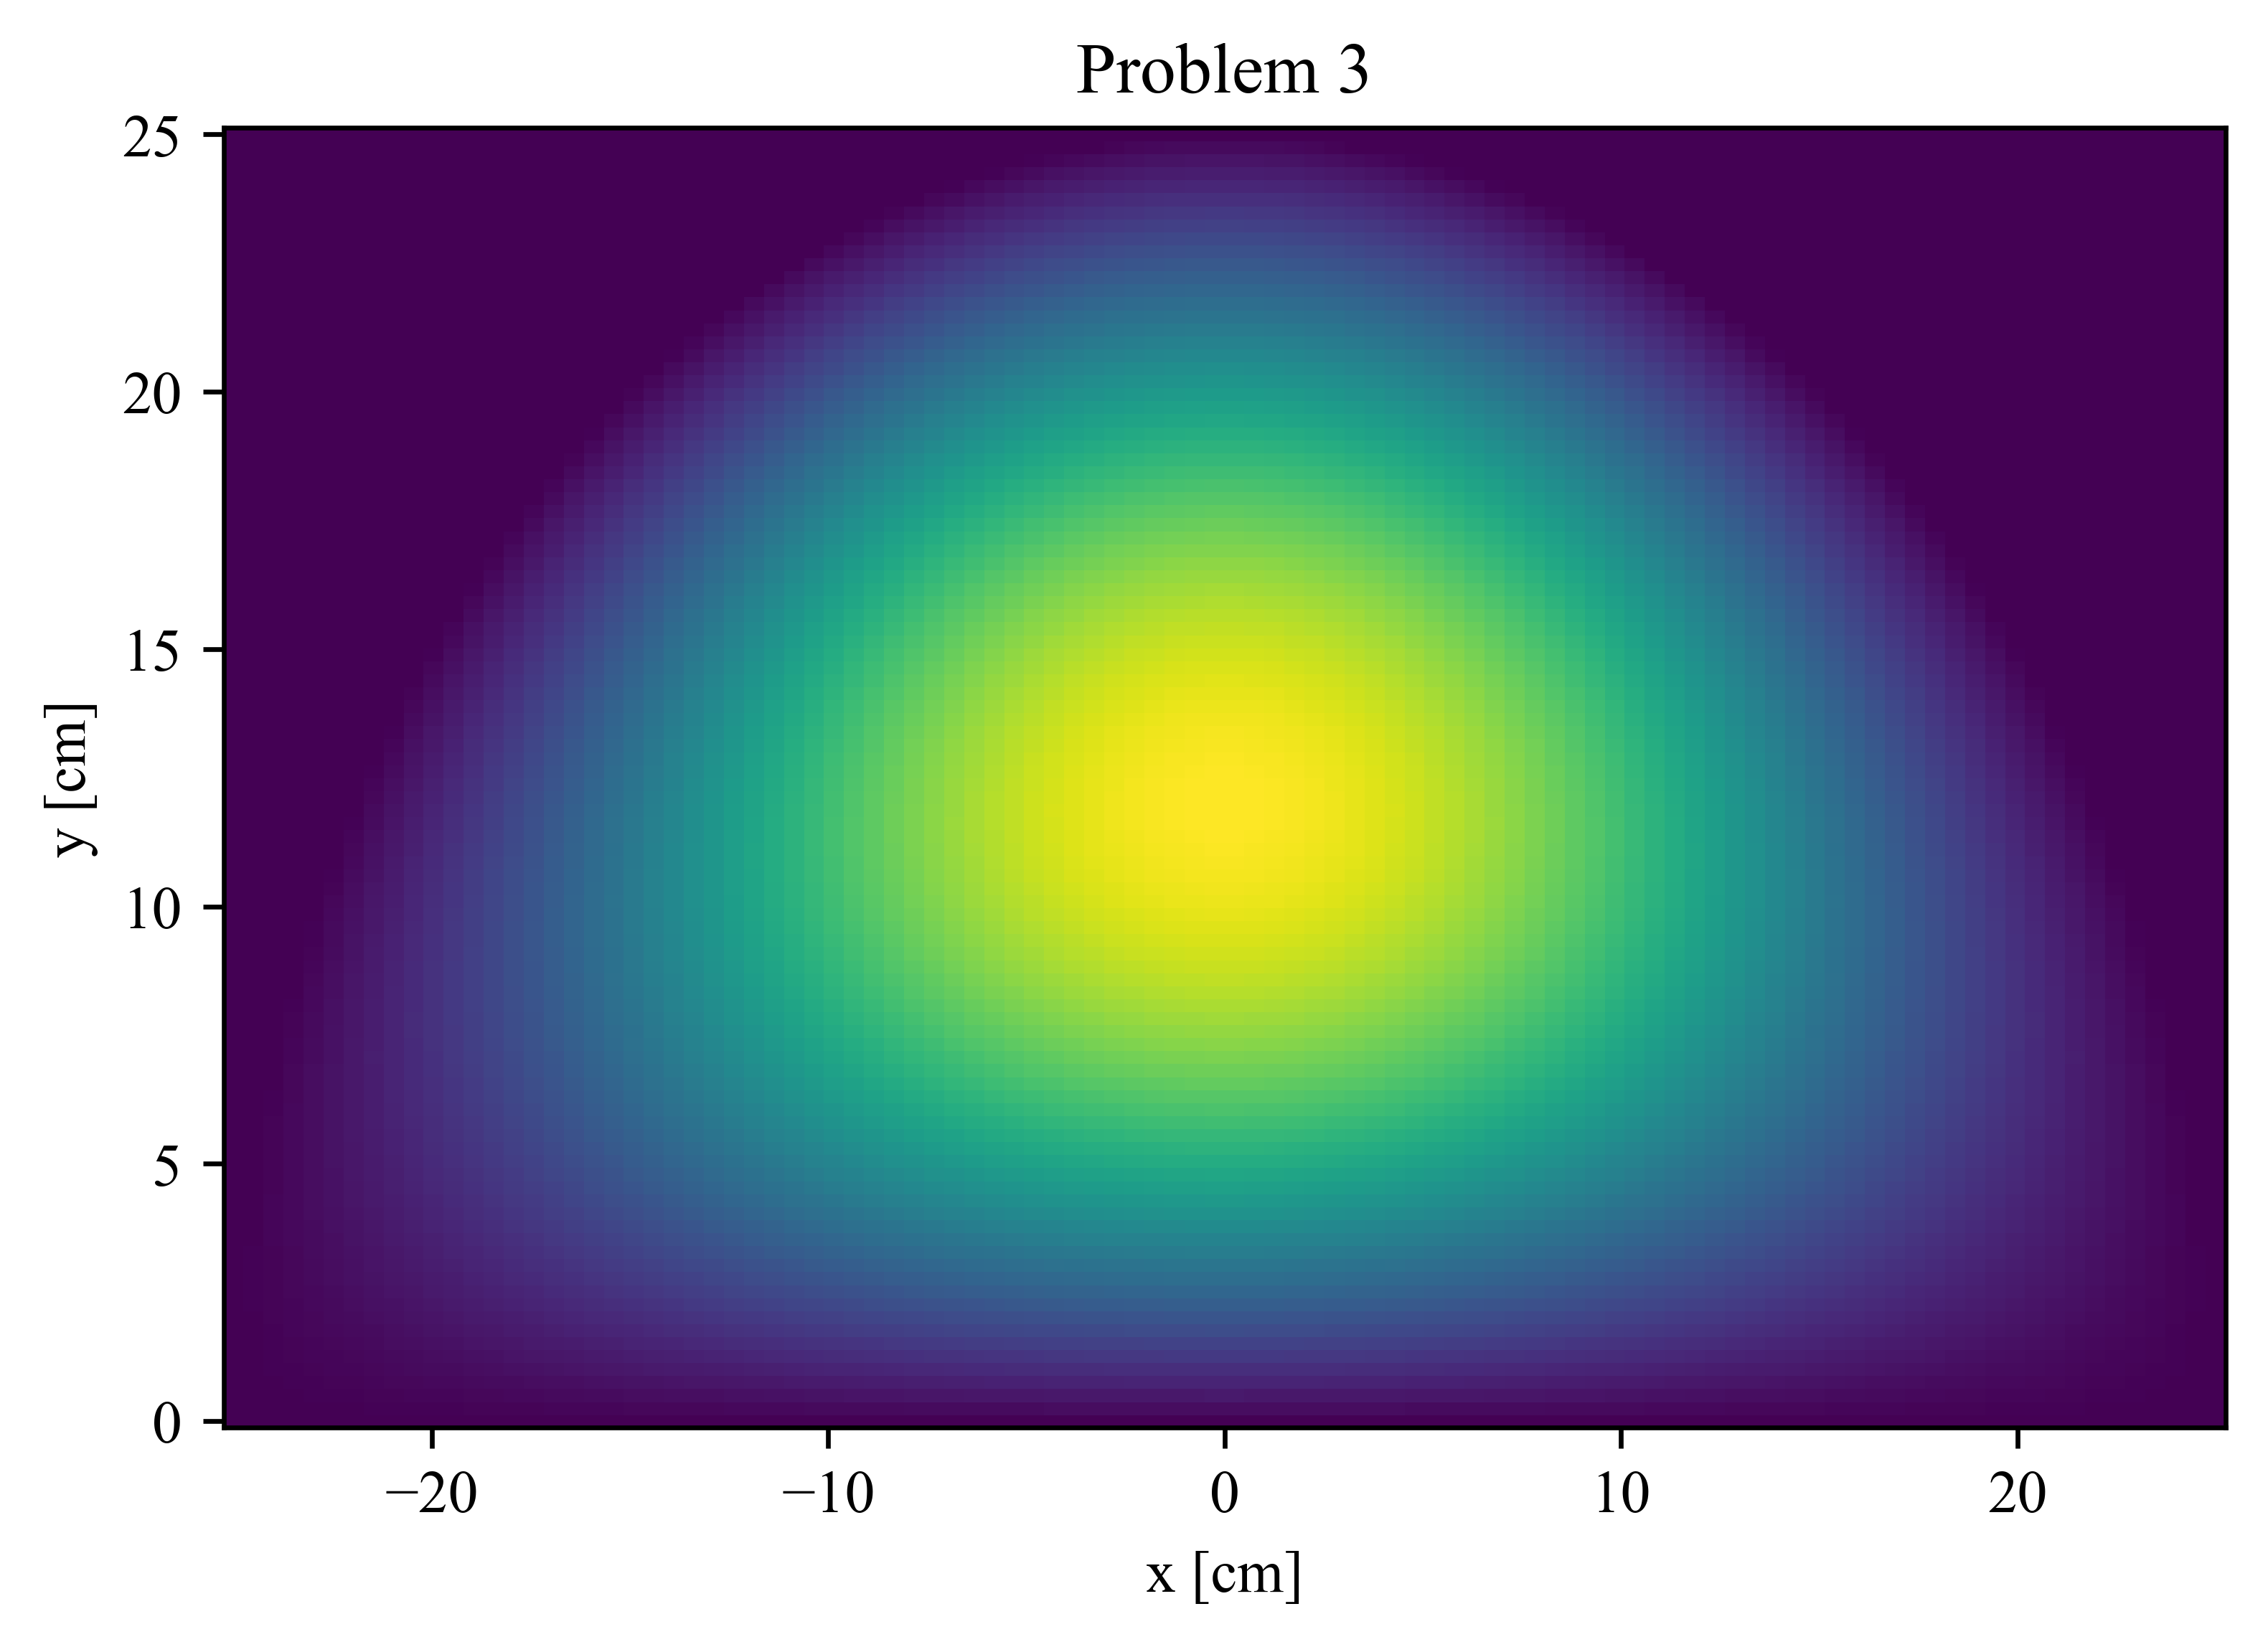

In [35]:
#3
D, nu, SigmaF, SigmaA, R, H = 1, 2.4, 0.026, 0.035, 25, 100

beta2 = (3.8317/R)**2
mu2 = (np.pi/2/H)**2

k_half = nu*SigmaF/(D*(beta2+mu2)+SigmaA)
print('k half cylin:', k_half)

# number of points to use in plot
n = 100
# arrays for x and y coordinates
x = np.linspace(0,R,n)
y = np.linspace(-R,R,n)
flux = np.zeros([n,n])
for i in range(len(x)):
    for j in range(len(y)):
        r = math.sqrt(x[i]**2+y[j]**2)
        theta = math.atan(y[j]/x[i])
        if(r<R):
            flux[i][j] = scipy.special.j1(3.8317/R*r)*np.cos(theta)
plt.figure(dpi=600)
plt.pcolor(y,x,flux)
plt.title('Problem 3')
plt.xlabel('x [cm]')
plt.ylabel('y [cm]')
plt.show